# Estimasi Motor bekas 
Memprediksi Penjualan motor bekas
Pada tahapan ini membutuhkan pengetahuan dari objek bisnis, dengan membangun atau mendapatkan data dan menyamakan tujuan pemodelan untuk tujuan bisnis sehingga model akan dibangun dengan baik. Tentang berkas ini : Perusahaan penjualan motor bekas menawarkan penilaian harga motor yang akan di beli menggunakan teknik pembelajaran mesin. Tujuan dari laporan ini adalah untuk memprediksi penjualan harga motor bekas yang akan di beli oleh pelanggan menggunakan Linear Regression. Dataset terdiri dari data pajangan motor bekas yang akan di jual. Kami akan memprediksi penjualan motor bekas dengan akurasi setidaknya 75-80%.

Dataset terdiri dari pajangan harga motor bekas yang nilai nya berupa satuan dollar . Dataset diperoleh dari Kaggle. Data ini diterbitkan/dirilis di bawah CC0: Domain Publik. link : https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset

Data Understanding
Pada tahapan ini merupakan dipakai untuk memeriksa data sehingga dapat mengidentifikasi masalah pada data yang kita dapatkan. Tahapan ini memberikan pondasi analitik untuk sebuah penelitian dengan membuat ringkasan (summary) dan mengidentifikasi potensi masalah dalam data.

Dataset terdiri dari  7 coloms dan 626 data harga motor bekas yang akan di jual

name (jenis motor yang tersedia dari merk hingga varian) = object
Selling_price (harga motor) = int64
year (tahun produksi motor) = int64
owner (tangan pembeli sebelumnya) = object
km_driven (Kilometer jarak tempuh ) = int64
ex_shroom_price (harga pembelian baru) = int64
Keterangan : name dan owner tidak tigunakan karena berupa object, Sehingga hanya 4 coloms yang digunakan.


# deskripsi library yang digunakan

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [162]:
df = pd.read_excel('BIKE DETAILS1.xls')

# Deskripsi Dataset

In [163]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643
2,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857
3,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719
4,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               626 non-null    object
 1   selling_price      626 non-null    int64 
 2   year               626 non-null    int64 
 3   seller_type        626 non-null    object
 4   owner              626 non-null    object
 5   km_driven          626 non-null    int64 
 6   ex_showroom_price  626 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 34.4+ KB


<AxesSubplot:>

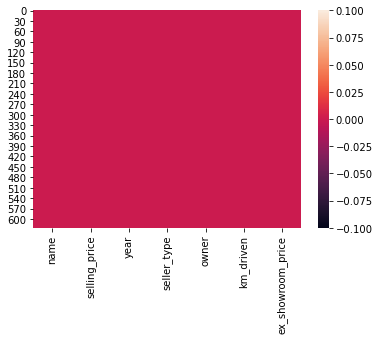

In [165]:
sns.heatmap(df.isnull())

In [166]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


# Visualisasi Data

<AxesSubplot:>

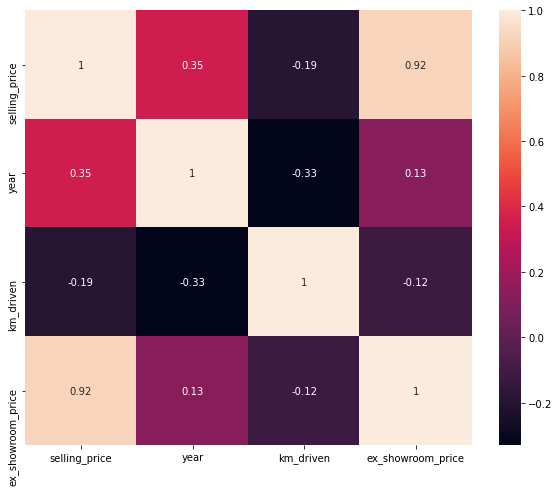

In [167]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah motor berdasarkan model

In [168]:
models = df.groupby('name').count()[['ex_showroom_price']].sort_values(by='ex_showroom_price',ascending=True).reset_index()
models = models.rename(columns={'ex_showroom_price':'numberOfCars'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

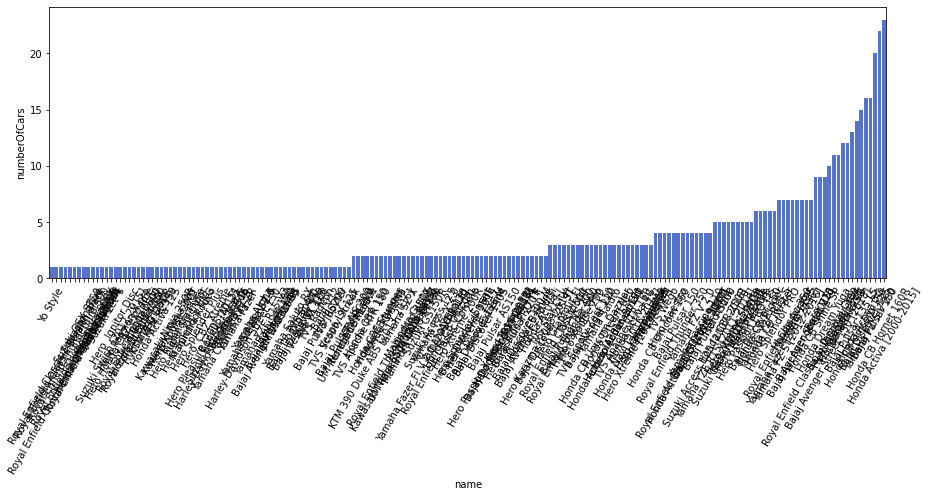

In [169]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['name'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

# motor yang paling laris terjual  

In [170]:
motor = df.groupby('name').count()[['selling_price']].sort_values(by='selling_price').reset_index()
motor = motor.rename(columns={'name':'count'})

<AxesSubplot:xlabel='selling_price', ylabel='count'>

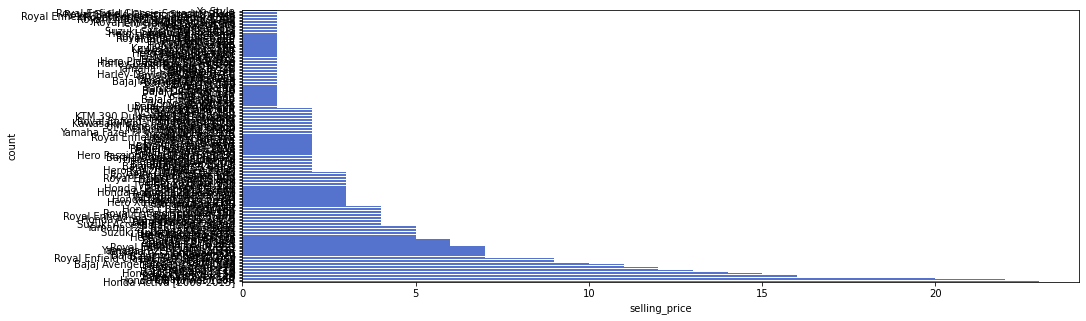

In [171]:
plt.figure(figsize=(15,5))
sns.barplot(x=motor['selling_price'], y=motor['count'], color='royalblue')

# distribusi Km_driven

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

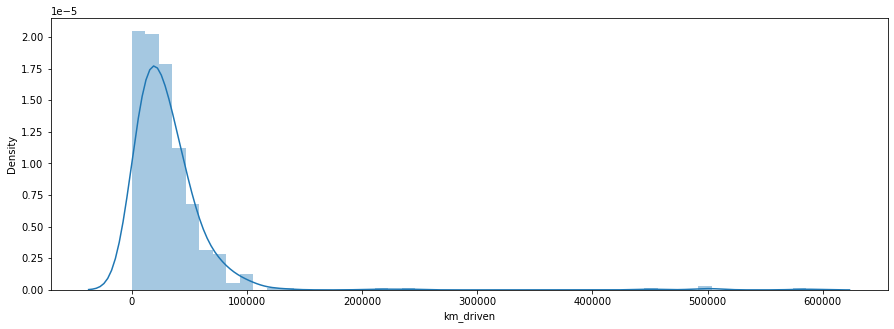

In [172]:
plt.figure(figsize=(15,5))
sns.distplot(df['km_driven'])

# distribusi harga motor

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

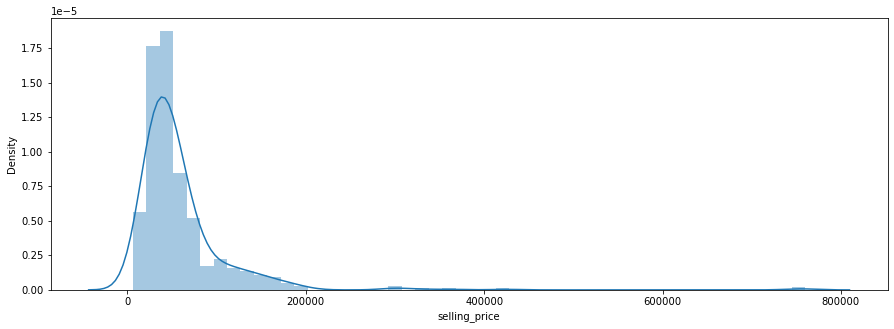

In [173]:
plt.figure(figsize=(15,5))
sns.distplot(df['selling_price'])

# Data Preparation 
Pada tahapan ini, Data preparation atau persiapan data adalah proses mempersiapkan data mentah (raw data) sebelum diolah lebih lanjut dengan menggunakan algoritma atau teknik tertentu. Tujuan dari data preparation adalah untuk memastikan data yang akan diolah sudah bersih, terstruktur dengan baik, dan siap untuk digunakan.

x = [features] (Independen) y = ['Selling_price'] (Dependen) features = ['year','km_driven','ex_showroom_price']

Menggunakan Features 3 Variabel X, Menggunakan Target 1 Variabel Y

Proses persiapan data yang baik dan benar sangat penting dalam keberhasilan suatu proyek analisis data. Hal ini dapat membantu menghindari kesalahan analisis dan menghasilkan hasil yang lebih akurat dan bermakna.

# seleksi fitur

In [174]:
features = ['year','km_driven','ex_showroom_price']
x = df[features]
y = df['selling_price']
x.shape, y.shape

((626, 3), (626,))

# split data training dan data testing

In [175]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(157,)

# membuat model regresi linier

#Modeling
Pada tahapan ini, merupakan tahap pengembangan model machine learning. Tahap ini melibatkan pemilihan algoritma, konfigurasi parameter, dan pembuatan model.

tahap penting dalam membangun model machine learning. Pada tahap ini, kita melakukan pemilihan algoritma dan konfigurasi parameter yang sesuai dengan tujuan bisnis dan data yang digunakan. Setelah model dibangun, kita akan mengevaluasi performa model dan menentukan apakah model tersebut cukup baik untuk diterapkan di dalam produksi (Deployment).

from sklearn.linear_model import LinearRegression: memuat class LinearRegression dari modul linear_model pada library scikit-learn.

lr = LinearRegression(): membuat objek model regresi linier dengan menggunakan class LinearRegression.

lr.fit(x_train, y_train): melatih model regresi linier dengan menggunakan data x_train sebagai fitur (variabel independen) dan y_train sebagai target (variabel dependen).

pred = lr.predict(X_test): melakukan prediksi nilai target (y) dengan menggunakan model yang telah dilatih (lr) dan data fitur yang baru (X_test).

Dalam implementasi regresi linier menggunakan library scikit-learn, langkah-langkah yang dilakukan biasanya meliputi pemisahan data menjadi data latih dan data uji (train_test_split), melakukan normalisasi data (jika diperlukan), membangun model regresi linier (LinearRegression), melatih model dengan data latih (fit), mengevaluasi performa model pada data uji, dan melakukan prediksi pada data baru (predict).

In [176]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

Evaluasi
Pada tahapan ini, bertujuan untuk mengevaluasi performa model machine learning yang telah dibangun dengan menggunakan metrik-metrik evaluasi yang sesuai. Tahap ini sangat penting untuk menentukan apakah model yang telah dibangun sudah cukup baik untuk diterapkan di dalam produksi atau tidak.

Penjelasan kode tersebut adalah sebagai berikut:

score = lr.score(X_test, y_test): menghitung skor akurasi dari model regresi linier yang telah dibangun dengan menggunakan data X_test sebagai fitur (variabel independen) dan y_test sebagai target (variabel dependen).

print('akurasi model regresi linier = ', score): mencetak nilai akurasi model regresi linier yang telah dihitung dengan menggunakan lr.score.

Skor akurasi (atau juga disebut dengan R-squared) mengindikasikan seberapa baik model dapat menjelaskan variasi data. Skor akurasi berkisar antara 0 dan 1, dan semakin dekat ke 1, semakin baik performa model. Pada kasus ini, jika skor akurasi model regresi linear bernilai 0.8849971344472867, artinya model dapat menjelaskan 88% dari variasi data.

In [177]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8849971344472867


# membuat inputan model regresi linier

In [178]:
#Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2018,12000,148114]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [111657.46544544]


# save model

In [179]:
import pickle

filename = 'estimasi_motor.sav'
pickle.dump(lr,open(filename,'wb'))